In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
%matplotlib inline

In [106]:
loan_desc = pd.read_csv('TensorFlow_FILES/DATA/lending_club_info.csv', index_col='LoanStatNew')

In [107]:
print(loan_desc.loc['dti']['Description'])

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [108]:
def feat_info(col_name):
    print(loan_desc.loc[col_name]['Description'])

In [109]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [110]:
loan_data = pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [111]:
loan_data.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [112]:
loan_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [113]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [114]:
loan_data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

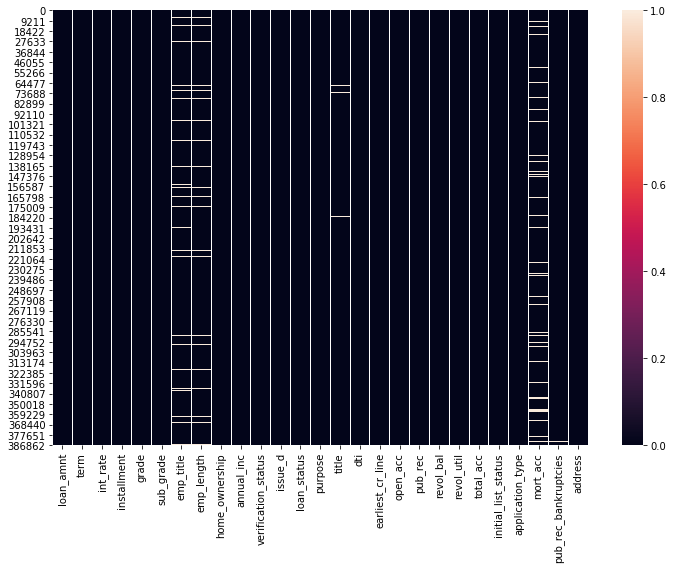

In [115]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_data.isnull())

In [116]:
feat_info('emp_title')
feat_info('emp_length')
feat_info('title')
feat_info('mort_acc')
feat_info('loan_status')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Number of mortgage accounts.
Current status of the loan


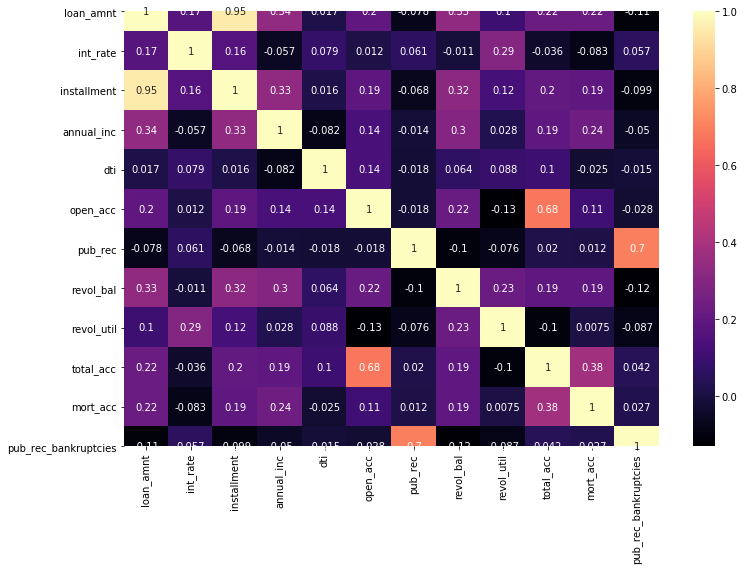

In [117]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_data.corr(), annot = True, cmap = 'magma')

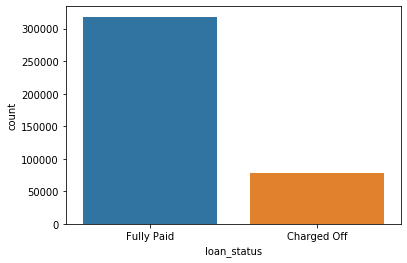

In [118]:
sns.countplot(loan_data['loan_status'])

In [119]:
feat_info('installment')
feat_info('pub_rec')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.
Number of derogatory public records
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


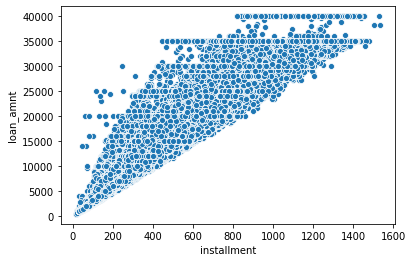

In [120]:
sns.scatterplot(y= 'loan_amnt', x = 'installment', data = loan_data)

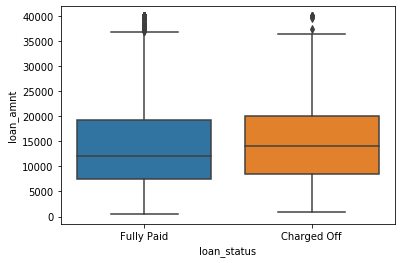

In [121]:
sns.boxplot(x= 'loan_status', y = 'loan_amnt', data = loan_data)

In [122]:
loan_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [123]:
sorted((loan_data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [124]:
subgrade_order = sorted((loan_data['sub_grade'].unique()))

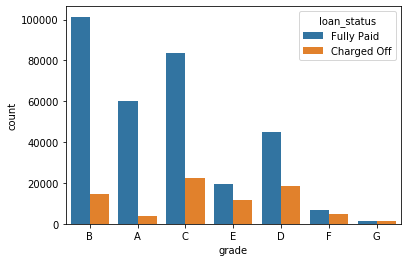

In [125]:
sns.countplot(x = 'grade', data = loan_data, hue ='loan_status')

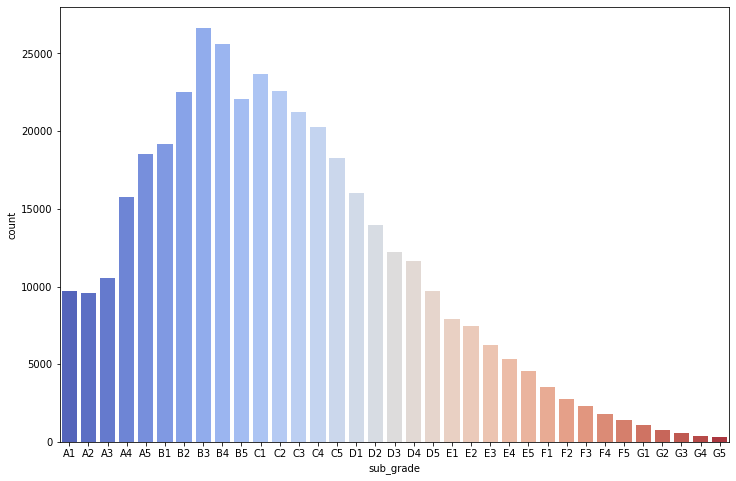

In [126]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'sub_grade',data = loan_data, order = subgrade_order, palette = 'coolwarm' )

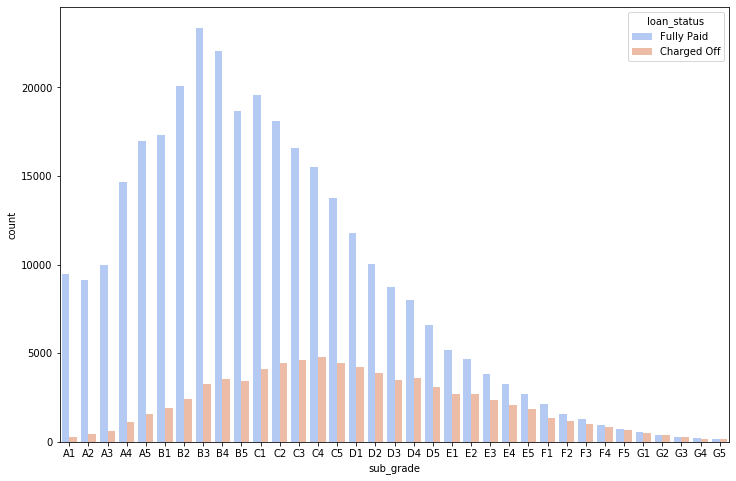

In [127]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'sub_grade',data = loan_data, order = subgrade_order, hue = 'loan_status', palette = 'coolwarm' )

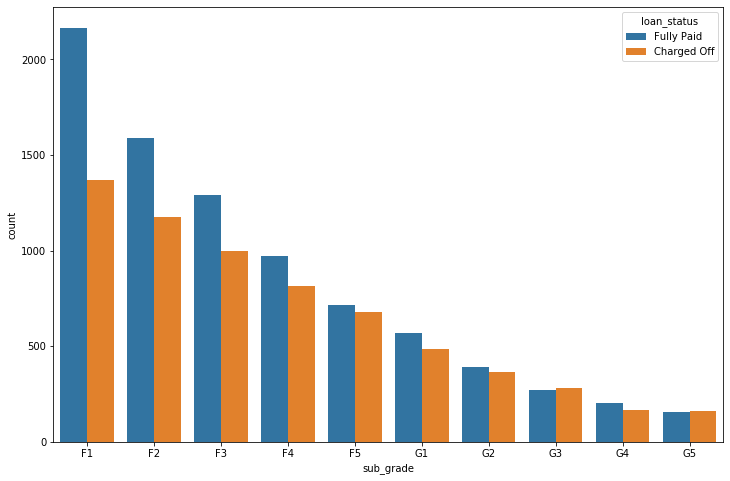

In [128]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'sub_grade',data = loan_data, order = subgrade_order[25:], hue = 'loan_status' )

In [129]:
loan_data['loan_repaid'] = pd.get_dummies(loan_data['loan_status'],drop_first= True)

In [130]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [131]:
#dummy_var.drop('Fully Paid', axis = 1,inplace = True)

In [132]:
loan_data['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: uint8

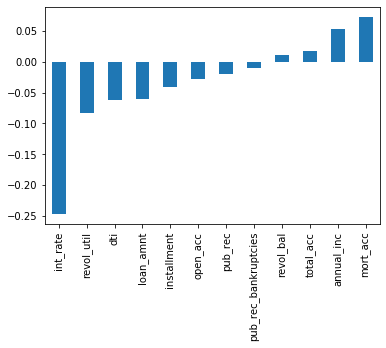

In [133]:
loan_data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

In [134]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [135]:
#convert 'term' into 60 months 1,0 by 0ne-hot encoding
#distribute 'grade' into catergorical data with columns A-F
#Drop sub_grade
#Drop emp_title
#remove years and other signs from 'emp_length'
#distribute 'home_ownership' into catergorical data with columns ['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'] for each purpose

loan_data['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [136]:
len(loan_data)

396030

In [137]:
loan_data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [138]:
loan_data.isnull().sum() / 396030*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [139]:
loan_data['emp_title'].nunique()

173105

In [140]:
loan_data['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Auto Trim Design              1
QUALITY TECHNICIAN            1
barnstable police dept        1
Fire Service Technician       1
uloader                       1
Name: emp_title, Length: 173105, dtype: int64

In [141]:
loan_data.drop('emp_title', axis =1, inplace  = True)

In [142]:
sorta_length = sorted(loan_data['emp_length'].dropna().unique())

In [143]:
sorted_length = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

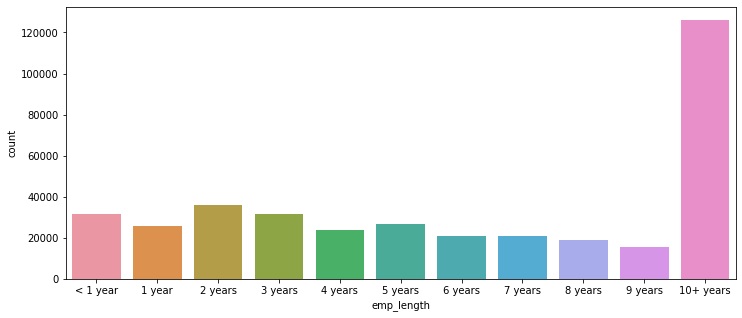

In [144]:
plt.figure (figsize = (12,5))
sns.countplot(loan_data['emp_length'], order = sorted_length)

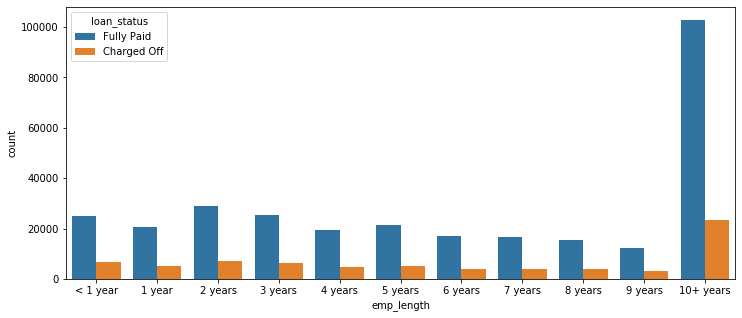

In [145]:
plt.figure (figsize = (12,5))
sns.countplot(loan_data['emp_length'], order = sorted_length, hue = loan_data['loan_status'])

In [146]:
emp_co = loan_data[loan_data['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [147]:
emp_fp =loan_data[loan_data['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [148]:
emp_percent = emp_co / (emp_co + emp_fp)

In [149]:
emp_percent

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

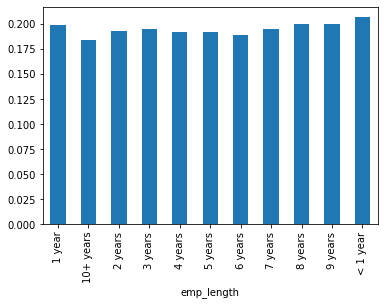

In [150]:
emp_percent.plot(kind = 'bar')

In [151]:
#Dropping the emp_length
loan_data.drop('emp_length', axis = 1, inplace = True)

In [152]:
loan_data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [153]:
loan_data['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [154]:
loan_data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [155]:
loan_data.drop('title', axis =1, inplace = True)

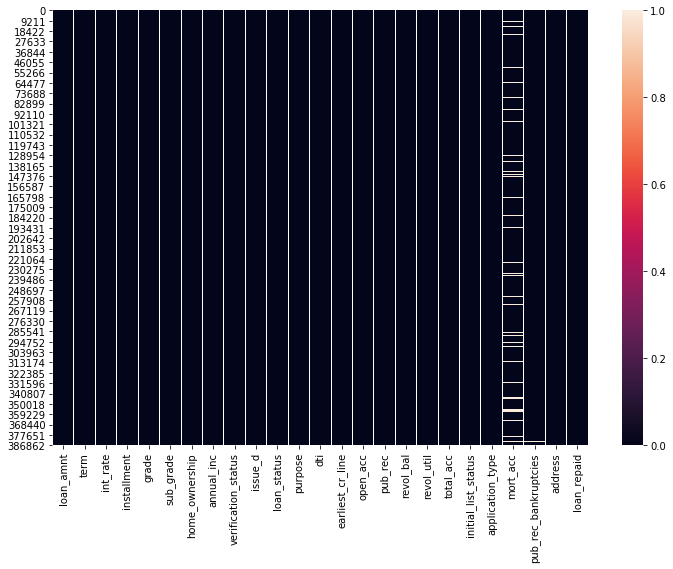

In [156]:
plt.figure(figsize = (12,8))
sns.heatmap(loan_data.isnull())

In [157]:
feat_info('mort_acc')

Number of mortgage accounts.


In [158]:
loan_data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [159]:
loan_data.corr()['mort_acc'].sort_values()
#checking which columns correlate highly with 'mort_acc' so we can fill missing data

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [160]:
total_acc_avg = loan_data.groupby('total_acc').mean()['mort_acc']

In [161]:
total_acc_avg[2]

0.0

In [162]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [163]:
loan_data['mort_acc'] = loan_data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [164]:
loan_data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [165]:
loan_data = loan_data.dropna()

In [166]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
loan_amnt               395219 non-null float64
term                    395219 non-null object
int_rate                395219 non-null float64
installment             395219 non-null float64
grade                   395219 non-null object
sub_grade               395219 non-null object
home_ownership          395219 non-null object
annual_inc              395219 non-null float64
verification_status     395219 non-null object
issue_d                 395219 non-null object
loan_status             395219 non-null object
purpose                 395219 non-null object
dti                     395219 non-null float64
earliest_cr_line        395219 non-null object
open_acc                395219 non-null float64
pub_rec                 395219 non-null float64
revol_bal               395219 non-null float64
revol_util              395219 non-null float64
total_acc               395219 non

In [167]:
loan_data.select_dtypes(exclude = ['float64']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address', 'loan_repaid'],
      dtype='object')

In [168]:
loan_data['term'] = loan_data['term'].apply(lambda term: int(term[:3]))

In [169]:
loan_data['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [170]:
loan_data.drop('grade',axis = 1,inplace = True)

In [171]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [172]:
sub_grade_dummies = pd.get_dummies(loan_data['sub_grade'], drop_first=True)

In [173]:
loan_data = pd.concat([loan_data, sub_grade_dummies], axis = 1)

In [174]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [175]:
loan_data.drop('sub_grade', axis =1, inplace = True)

In [176]:
loan_data.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [177]:
dummies = pd.get_dummies(loan_data[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
loan_data = loan_data.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
loan_data = pd.concat([loan_data,dummies],axis=1)

In [178]:
loan_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [179]:
loan_data['home_ownership']   =loan_data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [180]:
dummies = pd.get_dummies(loan_data['home_ownership'],drop_first=True)
loan_data = loan_data.drop('home_ownership',axis=1)
loan_data = pd.concat([loan_data,dummies],axis=1)

In [181]:
loan_data.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [182]:
loan_data['zip_code'] = loan_data['address'].apply(lambda x: x[-5:])

In [183]:
loan_data['zip_code'].nunique()

10

In [184]:
dummies = pd.get_dummies(loan_data['zip_code'],drop_first=True)

In [185]:
loan_data = loan_data.drop(['zip_code','address'],axis=1)

In [186]:
loan_data = pd.concat([loan_data,dummies],axis=1)

In [187]:
loan_data.select_dtypes('object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [188]:
loan_data = loan_data.drop('issue_d', axis =1)

In [189]:
loan_data['earliest_cr_year'] = loan_data['earliest_cr_line'].apply(lambda date:int(date[-4:]))
loan_data = loan_data.drop('earliest_cr_line',axis=1)

In [190]:
loan_data.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

In [191]:
loan_data =loan_data.drop('loan_status', axis =1)

In [192]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

# Train Test Split

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X = loan_data.drop('loan_repaid', axis =1).values
y= loan_data['loan_repaid'].values

In [195]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [196]:
#loan_data = loan_data.sample(frac = 0.1, random_state=101)
print(len(loan_data))

395219


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [198]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler

In [199]:
scaler = MinMaxScaler( )

In [200]:
X_train = scaler.fit_transform(X_train)

In [205]:
X_train.shape

(316175, 78)

In [201]:
X_test = scaler.transform(X_test)

In [202]:
from tensorflow.keras.models import Sequential

In [204]:
from tensorflow.keras.layers import Dense, Dropout

In [207]:
model = Sequential( )

model.add(Dense(78, activation = 'relu'))

model.add(Dense(39, activation = 'relu'))

model.add(Dense(19, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [208]:
model.fit(x = X_train, y=y_train, epochs =25 , validation_data=(X_test, y_test), batch_size=256)
        # callbacks = [early_stop])

Epoch 1/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2857 - val_loss: 0.2659
Epoch 2/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2626 - val_loss: 0.2639
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2611 - val_loss: 0.2628
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2594 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2585 - val_loss: 0.2633
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2577 - val_loss: 0.2613
Epoch 7/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2574 - val_loss: 0.2623
Epoch 8/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2569 - val_loss: 0.2607
Epoch 9/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2565 - val_loss: 0.2607
Epoch 10/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.256

In [213]:
from tensorflow.keras.models import load_model

In [214]:
model.save('my_model.h5')

In [217]:
losses = pd.DataFrame(model.history.history)

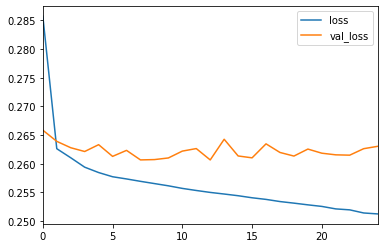

In [218]:
losses.plot()

# With early-stop

In [219]:
model = Sequential( )

model.add(Dense(78, activation = 'relu'))

model.add(Dense(39, activation = 'relu'))

model.add(Dense(19, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [222]:
from tensorflow.keras.callbacks import EarlyStopping

In [223]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 25)

In [224]:
model.fit(x = X_train, y=y_train, epochs =25 , validation_data=(X_test, y_test), batch_size=256, callbacks = [early_stop])

Epoch 1/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2851 - val_loss: 0.2766
Epoch 2/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2626 - val_loss: 0.2639
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2609 - val_loss: 0.2631
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2592 - val_loss: 0.2628
Epoch 5/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2584 - val_loss: 0.2617
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2578 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2573 - val_loss: 0.2610
Epoch 8/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2568 - val_loss: 0.2642
Epoch 9/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.2566 - val_loss: 0.2649
Epoch 10/25
1236/1236 [==============================] - 1s 1ms/step - loss: 0.256

In [225]:
model.save('my_second_model.h5')

In [226]:
losses = pd.DataFrame(model.history.history)

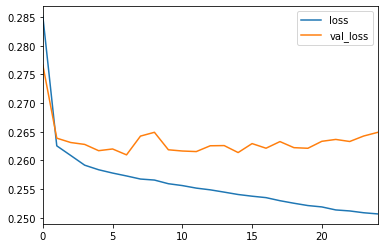

In [227]:
losses.plot()

# With Drop-outs and Early-stopping

In [228]:
model = Sequential( )

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [229]:
model.fit(x = X_train, y=y_train, epochs =25 , validation_data=(X_test, y_test), batch_size=256, callbacks = [early_stop])

Epoch 1/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.3364 - val_loss: 0.2678
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2751 - val_loss: 0.2649
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2694 - val_loss: 0.2638
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2672 - val_loss: 0.2653
Epoch 5/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2659 - val_loss: 0.2646
Epoch 6/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2657 - val_loss: 0.2641
Epoch 7/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2652 - val_loss: 0.2647
Epoch 8/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2645 - val_loss: 0.2642
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2646 - val_loss: 0.2637
Epoch 10/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.264

In [230]:
model.save('my_third_model.h5')

In [231]:
model_loss = pd.DataFrame(model.history.history)

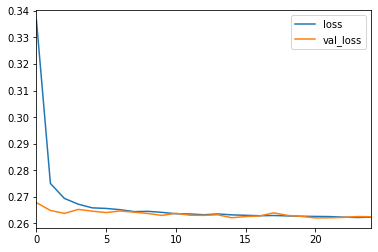

In [232]:
model_loss.plot()

In [233]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [234]:
from sklearn.metrics import classification_report, confusion_matrix

In [235]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [236]:
confusion_matrix(y_test,predictions)

array([[ 6723,  8935],
       [    0, 63386]], dtype=int64)

In [237]:
import random
random.seed(101)
random_ind = random.randint(0,len(loan_data))

new_customer = loan_data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [243]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])